In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
from tqdm import tqdm

In [2]:
# Stock names of the 10 companies we choose
ten_companies = [
    'MSFT',
    'AAPL',
    'AMZN',
    'GOOG',
    'BRK-A',
    'JPM',
    'V',
    'MCD',
    'KO',
    'JNJ'
    ]

In [3]:
root_data_path = "./ten_companies_cleaned_csvs/"

### Testing out the image creation on the cleaned data.

In [4]:
df = pd.read_csv(root_data_path+'AAPL'+'.csv')
df.head()

,Date,Close
0,2013-01-02,19.608213
1,2013-01-03,19.360714
2,2013-01-04,18.821428
3,2013-01-07,18.710714
4,2013-01-08,18.761070


In [5]:
df.shape

(2504, 2)

In [10]:
window_size = 50
step_size = 10

In [20]:
i=50
subset = df.iloc[i:i+window_size]
start_date = subset['Date'].iloc[0]
end_date = subset['Date'].iloc[-1]
prediction = 'High' if subset['Close'].iloc[-1] < df.iloc[i+window_size]['Close'] else 'Low'

print(start_date, end_date)

print(subset.head())
print('.\n.\n.')
print(subset.tail())

print(df.iloc[i+window_size]['Date'], df.iloc[i+window_size]['Close'], prediction)

2013-03-15 2013-05-24
          Date      Close
50  2013-03-15  15.845000
51  2013-03-18  16.275715
52  2013-03-19  16.231787
53  2013-03-20  16.145714
54  2013-03-21  16.168928
.
.
.
          Date      Close
95  2013-05-20  15.818929
96  2013-05-21  15.702143
97  2013-05-22  15.762500
98  2013-05-23  15.790714
99  2013-05-24  15.898214
2013-05-28 15.765713691711426 Low


In [21]:
#Testing various types of scaling

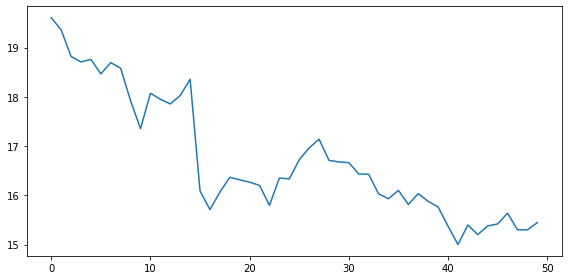

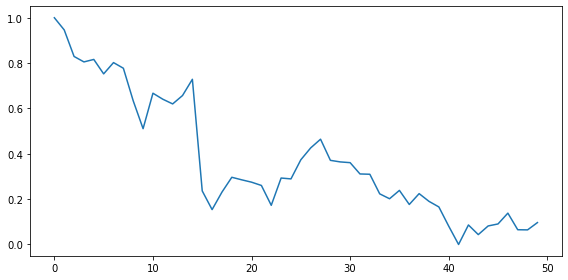

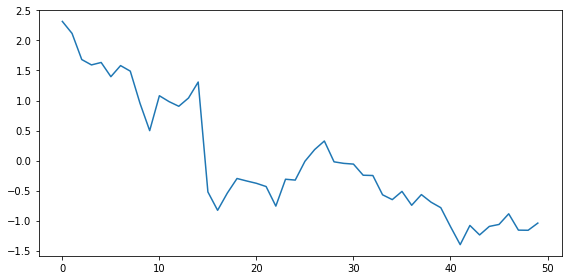

In [23]:
i=0
subset = df.iloc[i:i+50]

# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset[['Close']])
#plt.axis('off')  # Turn off axis
plt.tight_layout()

# Normalize the 'S&P500' values for the current subset
scaler = MinMaxScaler()
subset_normalized = scaler.fit_transform(subset[['Close']])
        
# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset_normalized)
#plt.axis('off')  # Turn off axis
plt.tight_layout()


scaler_s = StandardScaler()
subset_s = scaler_s.fit_transform(subset[['Close']])
        
# Plotting stock prices
plt.figure(figsize=(8, 4))  # Modify the figure size as needed
plt.plot( subset_s)
#plt.axis('off')  # Turn off axis
plt.tight_layout()

### Function that takes df and converts them into images.

In [75]:
def create_images_df(df, cmp_name, window_size, step_size):

    data = pd.read_csv(f'ten_companies_cleaned_csvs/{cmp_name}.csv')
    #print(data.shape)

    max_sample = len(data) - window_size
    
    for i in range(0, max_sample, step_size):
        
        subset = data.iloc[i:i+window_size]
        start_date = subset['Date'].iloc[0]
        end_date = subset['Date'].iloc[-1]
        prediction = 'High' if subset['Close'].iloc[-1] < data.iloc[i+window_size]['Close'] else 'Low'

        # Normalize the 'S&P500' values for the current subset
        scaler = MinMaxScaler()
        subset_normalized = scaler.fit_transform(subset[['Close']])
                
        # Plotting stock prices
        plt.figure(figsize=(8, 4))  # Modify the figure size as needed
        plt.plot(subset_normalized)
        plt.axis('off')  # Turn off axis
        plt.tight_layout()
        
        # Save the plot as an image
        image_path = f'img_data/{cmp_name}_image_{i}.png'  # Change the naming convention as needed
        plt.savefig(image_path)
        plt.close()
        
        df = df.append({
            'Company' : cmp_name,
            'Image_Path': image_path,
            'Start_Date': start_date,
            'End_Date': end_date,
            'Prediction': prediction
        }, ignore_index=True)

    return df



In [79]:
window_size = 50
step_size = 10

images_df = pd.DataFrame(columns=['Company', 'Image_Path', 'Start_Date', 'End_Date', 'Prediction'])

for cmp_name in tqdm(ten_companies):
    
    images_df = create_images_df(images_df, cmp_name, window_size, step_size)
    print(f"Finished creating images for company {cmp_name}")

images_df.to_csv('image_df.csv',index=False)

 10%|█         | 1/10 [00:14<02:14, 14.90s/it]

Finished creating images for company MSFT


 20%|██        | 2/10 [00:28<01:56, 14.56s/it]

Finished creating images for company AAPL


 30%|███       | 3/10 [00:43<01:42, 14.59s/it]

Finished creating images for company AMZN


 40%|████      | 4/10 [00:57<01:26, 14.38s/it]

Finished creating images for company GOOG


 50%|█████     | 5/10 [01:11<01:12, 14.41s/it]

Finished creating images for company BRK-A


 60%|██████    | 6/10 [01:26<00:58, 14.61s/it]

Finished creating images for company JPM


 70%|███████   | 7/10 [01:40<00:43, 14.40s/it]

Finished creating images for company V


 80%|████████  | 8/10 [01:55<00:29, 14.55s/it]

Finished creating images for company MCD


 90%|█████████ | 9/10 [02:10<00:14, 14.53s/it]

Finished creating images for company KO


100%|██████████| 10/10 [02:23<00:00, 14.33s/it]

Finished creating images for company JNJ


In [81]:
images_df

,Company,Image_Path,Start_Date,End_Date,Prediction
0,MSFT,img_data/MSFT_image_0.png,2013-01-02,2013-03-14,Low
1,MSFT,img_data/MSFT_image_10.png,2013-01-16,2013-03-28,Low
2,MSFT,img_data/MSFT_image_20.png,2013-01-31,2013-04-12,Low
3,MSFT,img_data/MSFT_image_30.png,2013-02-14,2013-04-26,High
4,MSFT,img_data/MSFT_image_40.png,2013-03-01,2013-05-10,High
...,...,...,...,...,...
2455,JNJ,img_data/JNJ_image_2410.png,2022-07-29,2022-10-07,High
2456,JNJ,img_data/JNJ_image_2420.png,2022-08-12,2022-10-21,High
2457,JNJ,img_data/JNJ_image_2430.png,2022-08-26,2022-11-04,High
2458,JNJ,img_data/JNJ_image_2440.png,2022-09-12,2022-11-18,Low
